<a href="https://colab.research.google.com/github/ekaratnida/Applied-machine-learning/blob/master/Week04-workshop-1/Week4_deploy_ml_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

   area  rooms   price
0  2104      3  399900
1  1600      3  329900
2  2400      3  369000
3  1416      2  232000
4  3000      4  539900
(47, 3)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 47 entries, 0 to 46
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   area    47 non-null     int64
 1   rooms   47 non-null     int64
 2   price   47 non-null     int64
dtypes: int64(3)
memory usage: 1.2 KB
None
              area      rooms          price
count    47.000000  47.000000      47.000000
mean   2000.680851   3.170213  340412.659574
std     794.702354   0.760982  125039.899586
min     852.000000   1.000000  169900.000000
25%    1432.000000   3.000000  249900.000000
50%    1888.000000   3.000000  299900.000000
75%    2269.000000   4.000000  384450.000000
max    4478.000000   5.000000  699900.000000
   area  rooms
0  2104      3
1  1600      3
2  2400      3
3  1416      2
4  3000      4
    price
0  399900
1  329900
2  369000

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

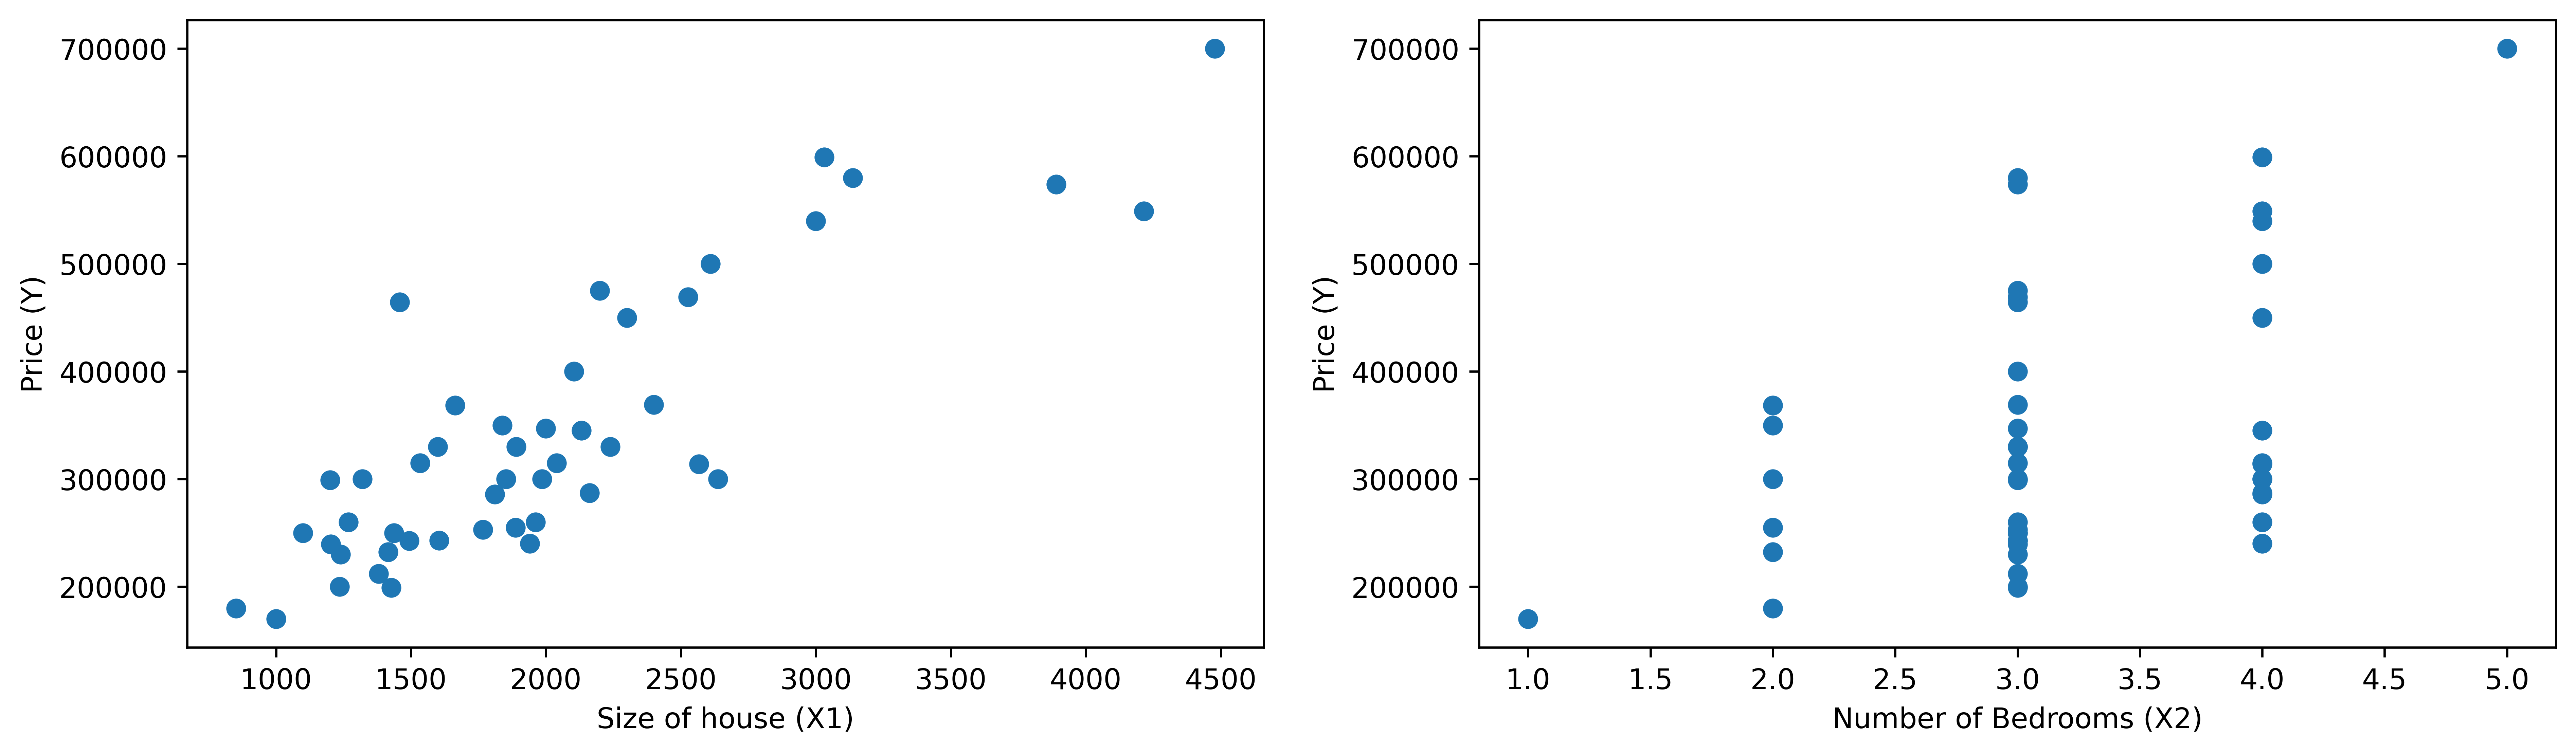

In [1]:
from sklearn.linear_model import LinearRegression
import pickle
import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt #dpi 600
import seaborn as sns
np.set_printoptions(suppress=True)

data = pd.read_csv('https://raw.githubusercontent.com/ekaratnida/Applied-machine-learning/master/Week04-workshop-1/data.txt')
print(data.head())
print(data.shape)
print(data.info())
print(data.describe())

#X = data[["area","rooms"]]
X = data.iloc[:,0:2]
print(X.head())

#y = data.price
#y = data.iloc[:,2]
y = data[["price"]]
print(y.head())

plt.figure(figsize = (15,4), dpi=600)
plt.subplot(121)
plt.scatter(X.iloc[:,0],y)
plt.xlabel("Size of house (X1)")
plt.ylabel("Price (Y)")

plt.subplot(122)
plt.scatter(X.iloc[:,1],y)
plt.xlabel("Number of Bedrooms (X2)")
plt.ylabel("Price (Y)")


#sns.heatmap(data)
"""Train model"""
print("Train")
lin_reg = LinearRegression()
lin_reg.fit(X, y) #training process
print(type(lin_reg.intercept_)) #theta0
print(type(lin_reg.coef_)) #theta1, theta2,...

"""Predict"""
print("Predict")
#X_test = np.array([[2000,6]])
X_test = pd.DataFrame(
    {
    "area":[2000],
    "rooms":[6]
    }
)
result = lin_reg.predict(X_test)
print(result)

"""Deploy"""
print("Deploy")
pickle.dump(lin_reg, open('model.sav','wb') )
from google.colab import files
files.download('model.sav')

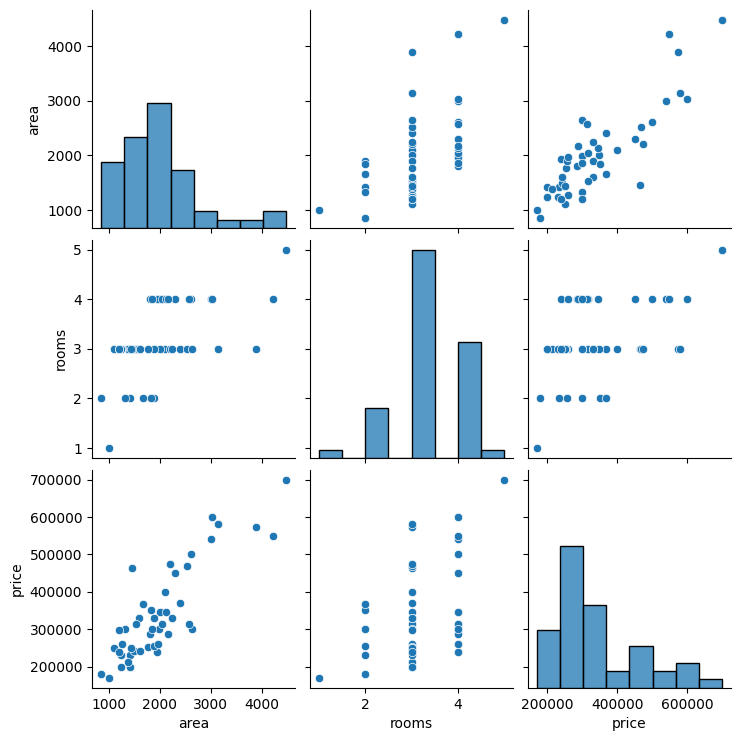

In [2]:
sns.pairplot(data)

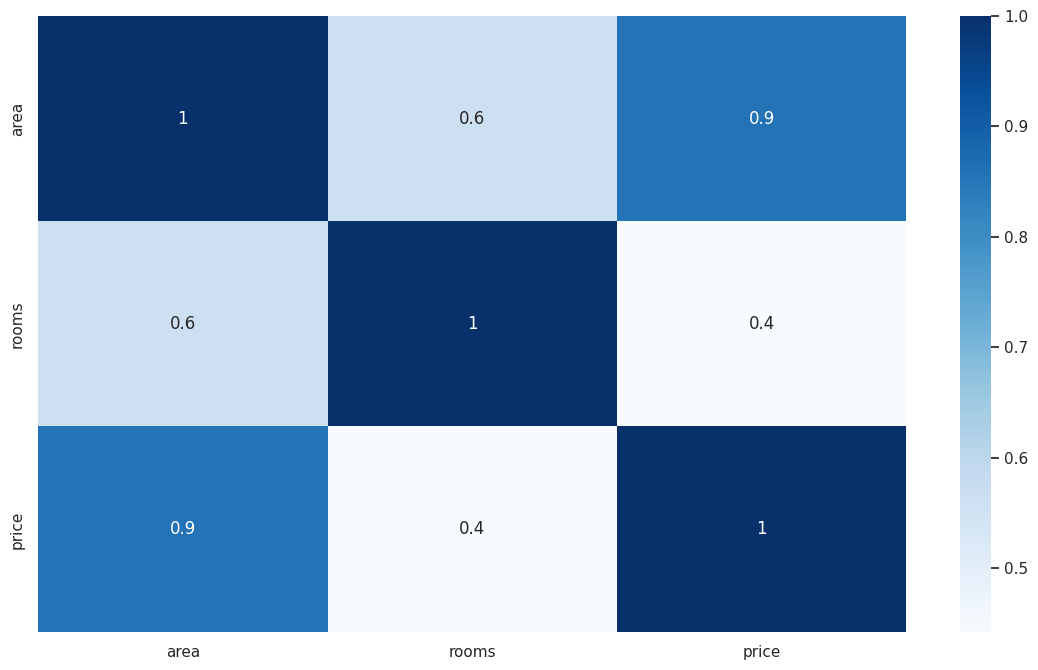

In [3]:
plt.figure(figsize=(14,8))
sns.set_theme(style="white")
corr = data.corr()
heatmap = sns.heatmap(corr, annot=True, cmap="Blues", fmt='.1g')
#is 0.4 closed to randomness?

#Appendix
1. Standardization
- min-max
- z-score

Info
https://developers.google.com/machine-learning/data-prep/transform/normalization?hl=en

In [4]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

scaler = StandardScaler()
scaler.fit(X) #calculate mu, sd
print(scaler.mean_)

Xs = scaler.transform(X)
print(Xs)

mscaler = MinMaxScaler()
mscaler.fit_transform(X) #calculate mu, sd
print(Xs)


[2000.68085106    3.17021277]
[[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]
 [-0.01994505  1.10220517]
 [-0.59358852 -0.22609337]
 [-0.72968575 -0.22609337]
 [-0.78946678 -0.22609337]
 [-0.64446599 -0.22609337]
 [-0.0771822   1.10220517]
 [-0.000866   -0.22609337]
 [-0.14077904 -0.22609337]
 [ 3.15099326  2.4305037 ]
 [-0.9319237  -0.22609337]
 [ 0.38071502  1.10220517]
 [-0.86578299 -1.5543919 ]
 [-0.97262567 -0.22609337]
 [ 0.77374348  1.10220517]
 [ 1.31050078  1.10220517]
 [-0.29722726 -0.22609337]
 [-0.14332291 -1.5543919 ]
 [-0.50455295 -0.22609337]
 [-0.0491996   1.10220517]
 [ 2.40309445 -0.22609337]
 [-1.14560907 -0.22609337]
 [-0.69025572 -0.22609337]
 [ 0.66817273 -0.22609337]
 [ 0.25352135 -0.22609337]
 [ 0.80935771 -0.22609337]
 [-0.20564782 -1.5543919 ]
 [-1.27280274 -2.88269044]
 [ 0.05001147  1.10220517]
 [ 1.44532608 -0.22609337]
 [-0.24126204  1.10220517]
 [-0.71696639 -0.22609337

In [5]:
print(Xs[0:5])

[[ 0.13141542 -0.22609337]
 [-0.5096407  -0.22609337]
 [ 0.5079087  -0.22609337]
 [-0.74367706 -1.5543919 ]
 [ 1.27107075  1.10220517]]


In [6]:
lin_reg.fit(Xs,y)
print(lin_reg.intercept_) #theta0
print(lin_reg.coef_) #theta1, theta2,...

[340412.65957447]
[[109447.79646964  -6578.35485416]]


In [7]:
print(X_test)

   area  rooms
0  2000      6


In [8]:
x_test_s = scaler.transform(X_test)
print(x_test_s)

[[-0.000866    3.75880224]]


In [9]:
result = lin_reg.predict(x_test_s)
print(result)

[[315591.14290408]]


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
      ('scaler', StandardScaler()),
      ('lr', LinearRegression())
      ])
pipe.fit(X, y)

Pipeline(steps=[('scaler', StandardScaler()), ('lr', LinearRegression())])

In [11]:
pipe.predict(X_test)

array([[315591.14290408]])